In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

Loading the data


In [ ]:
df = pd.read_csv("/content/metadata.csv")
df

,Unnamed: 0,split,audio_hash,beatmapset_id,beatmap_id,approved,total_length,hit_length,version,file_md5,...,video,download_unavailable,audio_unavailable,playcount,passcount,packs,max_combo,diff_aim,diff_speed,difficultyrating
0,0000e4db9a35c1e567265d350c299569,train,b06a550c393d8a72441932508595bf4e,35233,120019,1,102,88,Zelos' Hard,0000e4db9a35c1e567265d350c299569,...,0,0,0,40780,16453,"R38,R39,S203",297.0,1.38127,1.27099,2.70740
1,00010f0eb02ee131aacac54bf72d5444,train,5bea04ca275826768fa4f8411822c388,830266,1739583,1,221,215,Zero Vector,00010f0eb02ee131aacac54bf72d5444,...,0,0,0,37233,4581,S757,939.0,2.49147,2.39868,4.93655
2,0001599a2547ff2113753923d9bb93f6,train,f1a3190966c37d8aa83fe540f12e43f2,881569,1844646,1,96,95,Poii's Futsuu,0001599a2547ff2113753923d9bb93f6,...,0,0,0,1036,530,ST50,194.0,NaN,NaN,1.93105
3,0002d54f1de47dbcd242ff3dd2e24274,valid,d8702cabd065196cead6742827050265,658811,1395349,1,380,368,Virtual Beach,0002d54f1de47dbcd242ff3dd2e24274,...,0,0,0,36207,3213,S624,1394.0,1.85486,1.65950,3.61204
4,00034f3ca36bb76bb69e30c276726221,valid,19f71684a3c9a710594c7e927345c11d,56940,175250,1,87,81,Quilt's Insane,00034f3ca36bb76bb69e30c276726221,...,1,0,0,622464,86133,S310,403.0,2.01999,1.84677,3.95337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107972,fffaaa19b829e9468fb262a43a1d35ed,valid,b971c4d39da4d66622ee87ebd8d72757,529724,1123159,1,209,178,Mikii's Insane,fffaaa19b829e9468fb262a43a1d35ed,...,0,0,0,289473,77736,S524,976.0,2.31537,2.05292,4.49952
107973,fffb035752ca9dc399e5bb29becce59d,train,60ecfb5ff249d6c403e0c5285392cb36,847800,1772965,1,114,113,Cup,fffb035752ca9dc399e5bb29becce59d,...,0,0,0,3735,1260,SC18,328.0,1.62398,NaN,1.62398
107974,fffdb4b5f8979c30b4c2775a36fe16a4,test,6ecf260446def434363f30ca013988a2,1236029,2569441,1,165,163,Blacken's Purify,fffdb4b5f8979c30b4c2775a36fe16a4,...,0,0,0,1774,225,ST127,1317.0,NaN,NaN,6.26060
107975,ffff066a8aff02ef0c512f6d505e5f70,train,22665e687f646516a3f7821f528bb3f3,859022,1795143,1,87,87,I would really prefer if you would be quiet fe...,ffff066a8aff02ef0c512f6d505e5f70,...,0,0,0,73521,14463,S759,371.0,2.31619,1.88854,4.41856


<Figure size 1500x1000 with 0 Axes>

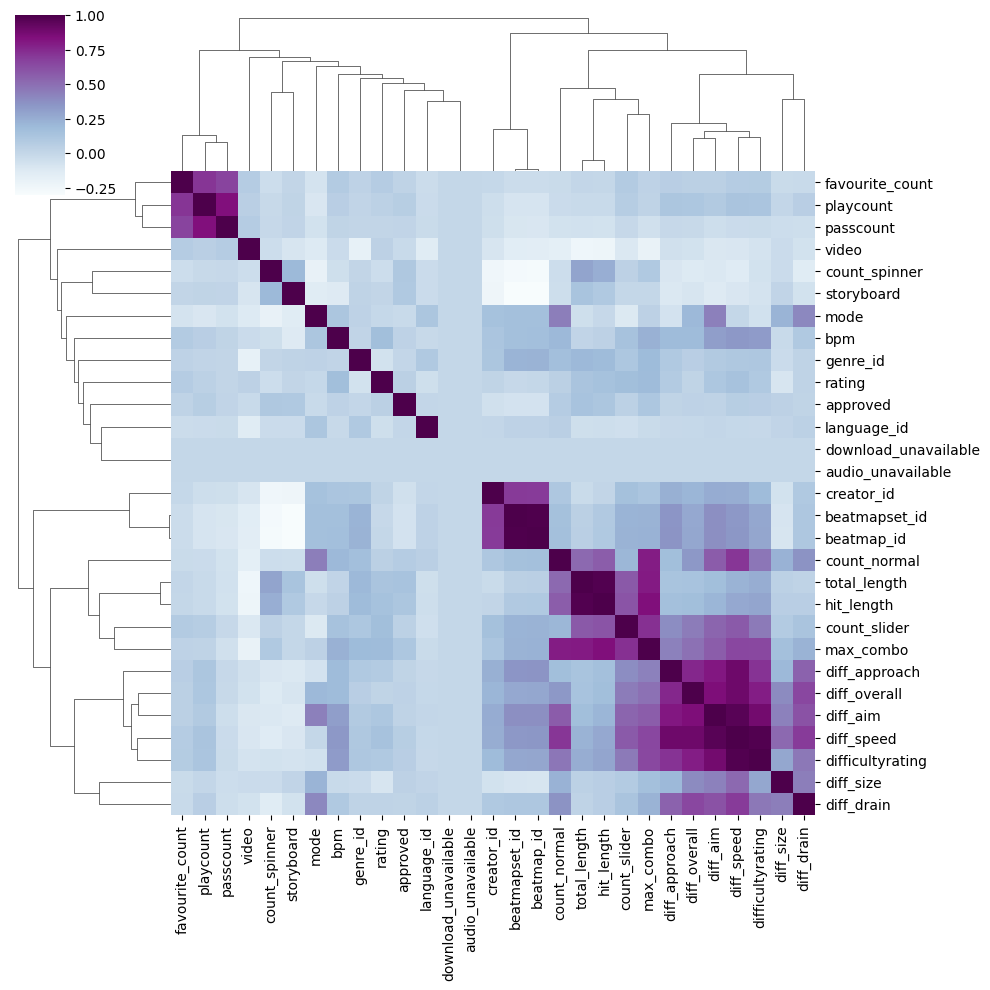

In [ ]:
ax = plt.figure(figsize=(15, 10))
corr_data = df.corr(numeric_only=True)
corr_data = corr_data.fillna(0)
sns.clustermap(corr_data, cmap="BuPu")

Cleaning the data

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
deleted_columns = ["Unnamed: 0", "audio_hash", "beatmapset_id", "beatmap_id", 'audio_unavailable',
                   "file_md5", "artist_unicode", "title_unicode", "packs", "submit_date",'packs',
                   "approved_date", "last_update", 'artist_unicode', 'title_unicode', 'creator_id', 'download_unavailable', ]

df.drop(columns= deleted_columns, axis=1, inplace=True)
df

,split,approved,total_length,hit_length,version,diff_size,diff_overall,diff_approach,diff_drain,mode,...,favourite_count,rating,storyboard,video,playcount,passcount,max_combo,diff_aim,diff_speed,difficultyrating
0,train,1,102,88,Zelos' Hard,4.0,5.0,7.0,5.0,0,...,66,9.18201,1,0,40780,16453,297.0,1.38127,1.27099,2.70740
1,train,1,221,215,Zero Vector,5.0,8.0,8.0,5.0,0,...,71,8.37821,0,0,37233,4581,939.0,2.49147,2.39868,4.93655
2,train,1,96,95,Poii's Futsuu,2.0,3.0,10.0,7.0,1,...,7,9.18750,0,0,1036,530,194.0,NaN,NaN,1.93105
3,valid,1,380,368,Virtual Beach,3.0,7.0,7.0,6.0,0,...,97,9.11765,0,0,36207,3213,1394.0,1.85486,1.65950,3.61204
4,valid,1,87,81,Quilt's Insane,4.0,7.0,8.0,7.0,0,...,161,9.37756,0,1,622464,86133,403.0,2.01999,1.84677,3.95337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107972,valid,1,209,178,Mikii's Insane,4.0,7.0,9.0,6.0,0,...,929,9.52977,0,0,289473,77736,976.0,2.31537,2.05292,4.49952
107973,train,1,114,113,Cup,2.5,6.0,6.0,3.0,2,...,39,9.40594,0,0,3735,1260,328.0,1.62398,NaN,1.62398
107974,test,1,165,163,Blacken's Purify,5.0,6.8,10.0,5.0,1,...,26,9.05952,0,0,1774,225,1317.0,NaN,NaN,6.26060
107975,train,1,87,87,I would really prefer if you would be quiet fe...,4.2,7.4,8.3,6.5,0,...,64,9.00329,0,0,73521,14463,371.0,2.31619,1.88854,4.41856


In [ ]:
language_type = {0: "any", 1: "unspecified", 2: "english", 3: "japanese", 4: "chinese", 5: "instrumental", 6: "korean",
                 7: "french", 8: "german", 9: "swedish", 10: "spanish", 11: "italian", 12: "russian", 13: "polish", 14: "other"}
genre_type = {0: "any", 1: "unspecified", 2: "video game", 3: "anime", 4: "rock", 5: "pop", 6: "other",
                 7: "novelty", 9: "hip hop", 10: "electronic", 11: "metal", 12: "classical", 13: "folk", 14: "jazz"}


df['language_id'] = df['language_id'].map(language_type)
df['genre_id'] = df['genre_id'].map(genre_type)

In [ ]:
df.dropna(subset=["diff_aim", "diff_speed", "difficultyrating"], inplace=True)

Data visualisation

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # First subplot
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
# data = df.groupby(["title"]).playcount.mean().sort_values(ascending=False)[:20]
# sns.barplot(x=data, y=data.index, palette="inferno", ax=axes[0])
# axes[0].set_xlabel("Number of plays")
# axes[0].set_ylabel("Artist name")
# axes[0].set_title("Top 20 Beatmaps by playcount")

# # Second subplot
# data = df.groupby(["artist"]).playcount.mean().sort_values(ascending=False)[:20]
# sns.barplot(x=data, y=data.index, palette="inferno", ax=axes[1])
# axes[1].set_xlabel("Number of plays")
# axes[1].set_ylabel("Artist name")
# axes[1].set_title("Top 20 Artists by playcount")

# # Adjust spacing between subplots
# plt.tight_layout()

# # Display the plot
# plt.show()

Text(0.5, 1.0, 'Top 20 beatmaps by playcount')

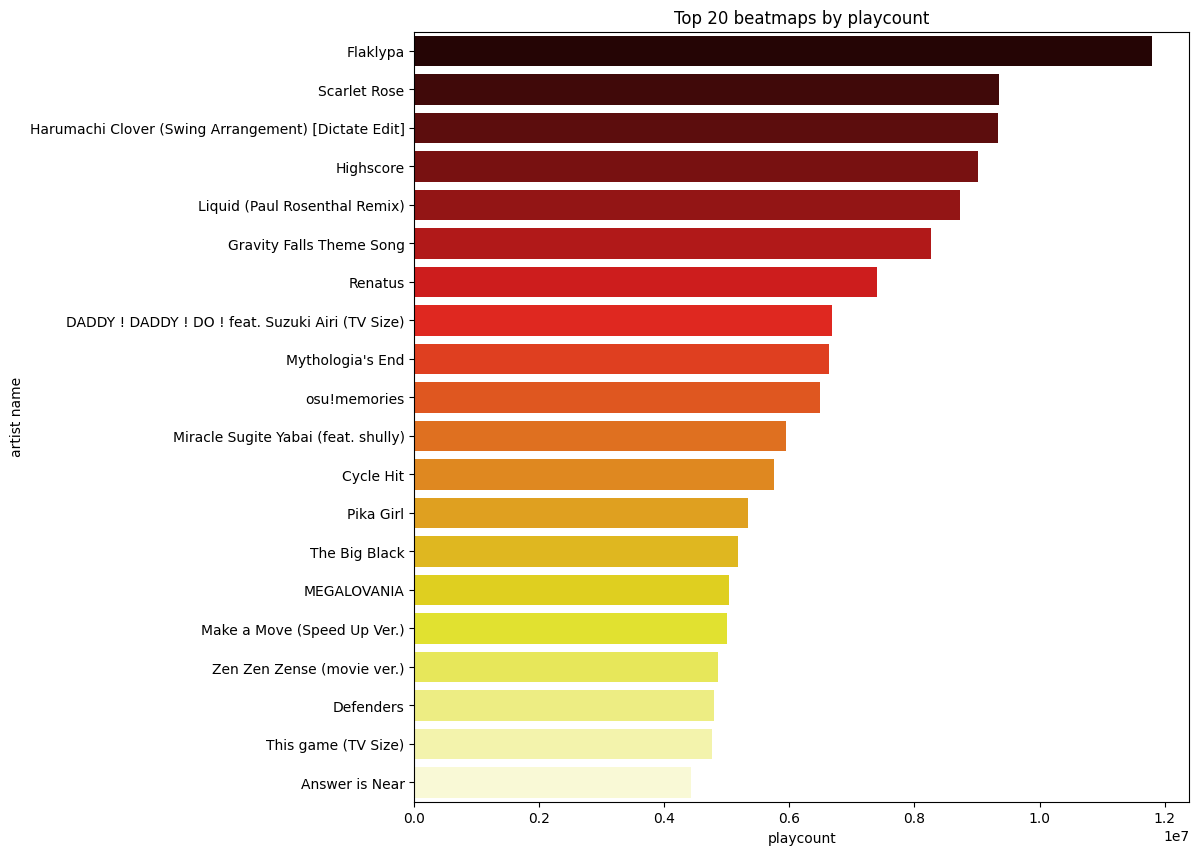

In [ ]:
plt.figure(figsize=(10, 10))
data = df.groupby(["title"]).playcount.mean().sort_values(ascending=False)[:20]
sns.barplot(x=data, y=data.index, palette="hot")
plt.xlabel("playcount")
plt.ylabel("artist name")
plt.title("Top 20 beatmaps by playcount")

Text(0.5, 1.0, 'Top 20 beatmaps by difficulty')

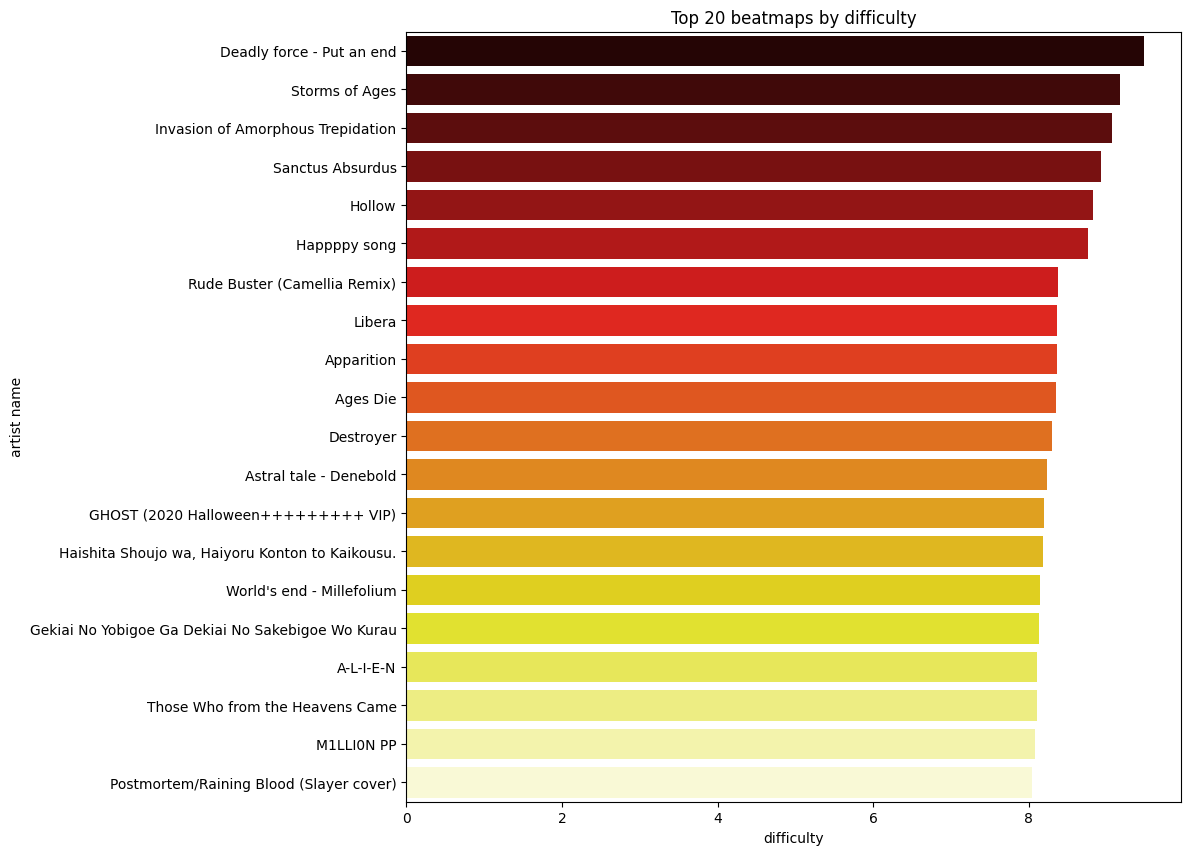

In [ ]:
plt.figure(figsize=(10, 10))
data = df.groupby(["title"]).difficultyrating.mean().sort_values(ascending=False)[:20]
sns.barplot(x=data, y=data.index, palette="hot")
plt.xlabel("difficulty")
plt.ylabel("artist name")
plt.title("Top 20 beatmaps by difficulty")

In [ ]:
plt.figure(figsize=(20, 10))
data = df.groupby(["title"]).length.mean().sort_values(ascending=False)[:20]
sns.barplot(x=data, y=data.index, palette="hot")
plt.xlabel("difficulty")
plt.ylabel("artist name")
plt.title("Top 20 beatmaps by difficulty")

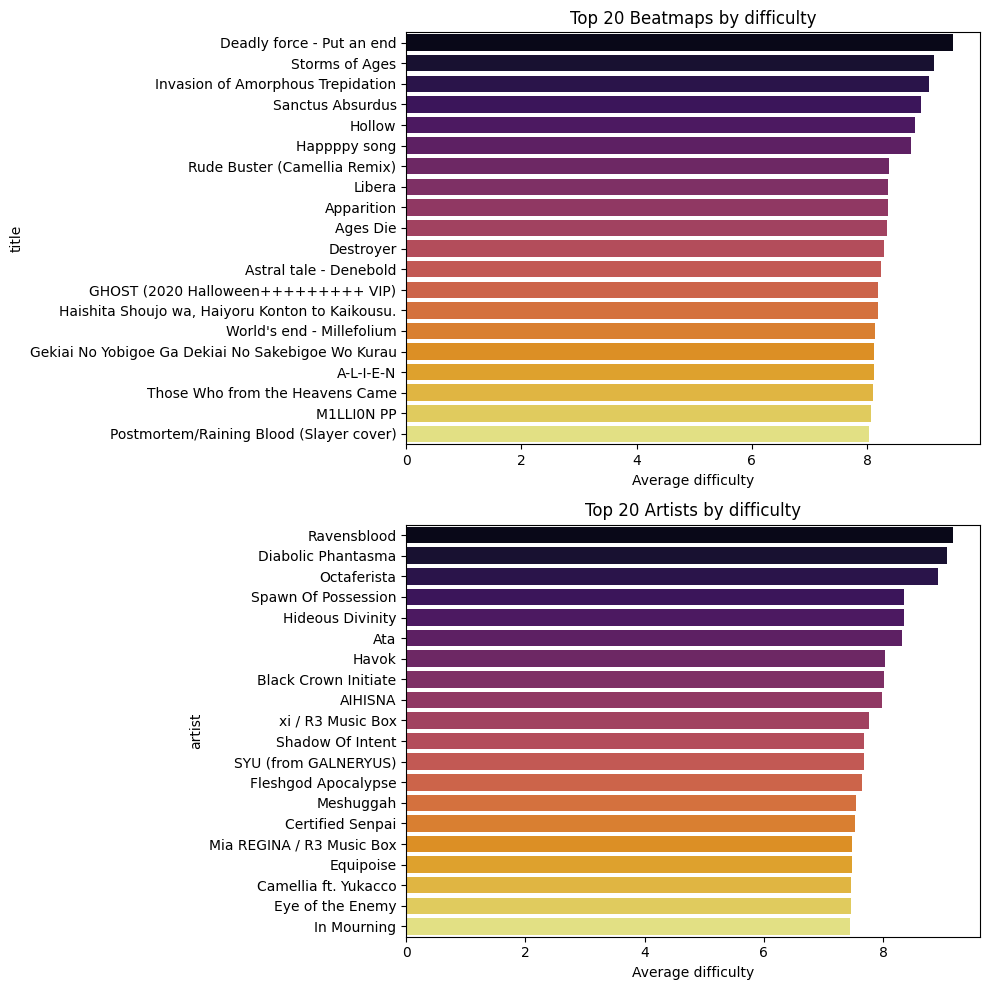

In [ ]:
# First subplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
data = df.groupby(["title"]).difficultyrating.mean().sort_values(ascending=False)[:20]
sns.barplot(x=data, y=data.index, palette="inferno", ax=axes[0])
axes[0].set_xlabel("Average difficulty")
axes[0].set_title("Top 20 Beatmaps by difficulty")

# Second subplot
data = df.groupby(["artist"]).difficultyrating.mean().sort_values(ascending=False)[:20]
sns.barplot(x=data, y=data.index, palette="inferno", ax=axes[1])
axes[1].set_xlabel("Average difficulty")
axes[1].set_title("Top 20 Artists by difficulty")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Top 20 Beatmaps by difficulty')

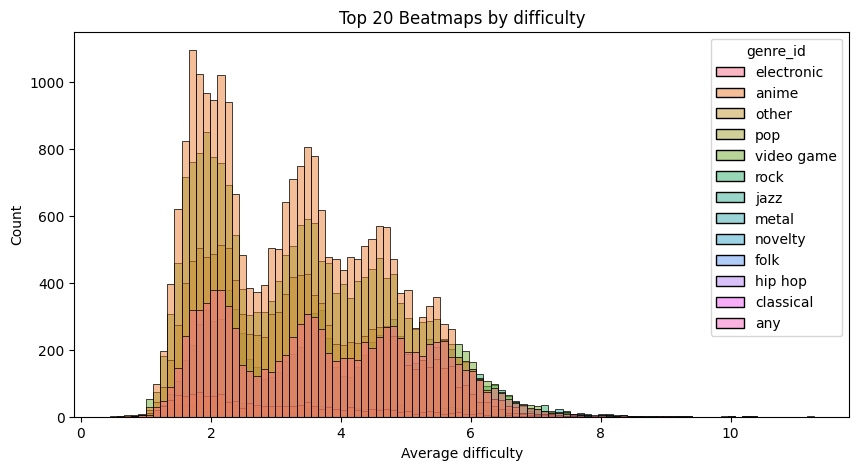

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
data = df.copy()
sns.histplot(data=data, x="difficultyrating", hue="genre_id", ax=axes)
axes.set_xlabel("Average difficulty")
axes.set_title("Top 20 Beatmaps by difficulty")

In [ ]:
difficulty_columns = ["approved", "version", 'artist', 'title', 'creator', 'tags', 'source', 'video']
data = df.drop(columns = difficulty_columns)

In [ ]:
data

,split,total_length,hit_length,diff_size,diff_overall,diff_approach,diff_drain,mode,count_normal,count_slider,...,language_id,favourite_count,rating,storyboard,playcount,passcount,max_combo,diff_aim,diff_speed,difficultyrating
0,train,102,88,4.0,5.0,7.0,5.0,0,76,85,...,instrumental,66,9.18201,1,40780,16453,297.0,1.381270,1.270990,2.70740
1,train,221,215,5.0,8.0,8.0,5.0,0,939,0,...,chinese,71,8.37821,0,37233,4581,939.0,2.491470,2.398680,4.93655
3,valid,380,368,3.0,7.0,7.0,6.0,0,354,439,...,instrumental,97,9.11765,0,36207,3213,1394.0,1.854860,1.659500,3.61204
4,valid,87,81,4.0,7.0,8.0,7.0,0,171,100,...,japanese,161,9.37756,0,622464,86133,403.0,2.019990,1.846770,3.95337
5,train,127,89,4.0,8.4,9.2,5.5,0,351,159,...,instrumental,165,9.41860,0,30574,4671,730.0,2.864170,2.686040,5.63927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107970,train,179,164,3.0,2.0,3.0,2.0,0,59,85,...,japanese,76,9.48749,0,21618,10885,314.0,0.750037,0.704831,1.47747
107971,test,159,133,2.6,2.0,3.0,2.0,0,72,108,...,english,121,8.94771,0,16867,7285,394.0,1.007870,0.876717,1.95016
107972,valid,209,178,4.0,7.0,9.0,6.0,0,246,328,...,japanese,929,9.52977,0,289473,77736,976.0,2.315370,2.052920,4.49952
107975,train,87,87,4.2,7.4,8.3,6.5,0,189,85,...,instrumental,64,9.00329,0,73521,14463,371.0,2.316190,1.888540,4.41856


In [ ]:
data = pd.get_dummies(data, columns=["language_id", "genre_id"])

In [ ]:
train_data = data[data.split == "train"].drop(columns = ["split"])
valid_data = data[data.split == "valid"].drop(columns = ["split"])
test_data = data[data.split == "test"].drop(columns = ["split"])

In [ ]:
diff_aim_train = train_data.pop("diff_aim")
diff_speed_train = train_data.pop("diff_speed")
overall_diff_train = train_data.pop("difficultyrating")

diff_aim_valid = valid_data.pop("diff_aim")
diff_speed_valid = valid_data.pop("diff_speed")
overall_diff_valid = valid_data.pop("difficultyrating")

diff_aim_test = test_data.pop("diff_aim")
diff_speed_test = test_data.pop("diff_speed")
overall_diff_test = test_data.pop("difficultyrating")

In [ ]:
difficulty_imputer = SimpleImputer(strategy="median")
train_data = difficulty_imputer.fit_transform(train_data)
valid_data = difficulty_imputer.transform(valid_data)

difficulty_scaler = StandardScaler()
train_data = difficulty_scaler.fit_transform(train_data)
valid_data = difficulty_scaler.transform(valid_data)

Creating the model

In [ ]:
input = keras.Input(shape=(44, ))
x = layers.Dense(units=64, activation="relu")(input)
x = layers.Dense(units=64, activation="relu")(x)
x = layers.Dense(units=64, activation="relu")(x)
x = layers.Dense(units=64, activation="relu")(x)
aim_output = layers.Dense(1)(x)
speed_output = layers.Dense(1)(x)
diff_output = layers.Dense(1)(x)

model = keras.Model(inputs = input, outputs=[aim_output, speed_output, diff_output])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics="mae")

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

model.fit(
    train_data,
    [diff_aim_train, diff_speed_train, overall_diff_train],
    epochs=100,
    batch_size=64,
    validation_data=[valid_data,
                     [diff_aim_valid, diff_speed_valid, overall_diff_valid]],
    callbacks=[early_stopping]
)


Epoch 1/100
1024/1024 [==============================] - 4s 3ms/step - loss: 0.5101 - dense_53_loss: 0.1011 - dense_54_loss: 0.0690 - dense_55_loss: 0.3400 - dense_53_mae: 0.1980 - dense_54_mae: 0.1678 - dense_55_mae: 0.3515 - val_loss: 0.1858 - val_dense_53_loss: 0.0393 - val_dense_54_loss: 0.0276 - val_dense_55_loss: 0.1189 - val_dense_53_mae: 0.1459 - val_dense_54_mae: 0.1243 - val_dense_55_mae: 0.2563
Epoch 2/100
1024/1024 [==============================] - 3s 2ms/step - loss: 0.1860 - dense_53_loss: 0.0400 - dense_54_loss: 0.0277 - dense_55_loss: 0.1183 - dense_53_mae: 0.1464 - dense_54_mae: 0.1220 - dense_55_mae: 0.2523 - val_loss: 0.1733 - val_dense_53_loss: 0.0408 - val_dense_54_loss: 0.0233 - val_dense_55_loss: 0.1092 - val_dense_53_mae: 0.1469 - val_dense_54_mae: 0.1096 - val_dense_55_mae: 0.2394
Epoch 3/100
1024/1024 [==============================] - 3s 3ms/step - loss: 0.1620 - dense_53_loss: 0.0354 - dense_54_loss: 0.0238 - dense_55_loss: 0.1028 - dense_53_mae: 0.1381 - d

In [ ]:
def preprocess_test_data(data):
  data = difficulty_imputer.transform(data)
  data = difficulty_scaler.transform(data)
  return data

test_data = preprocess_test_data(test_data)
predictions = model.predict(test_data, batch_size=64)
predictions